In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from importlib import reload
import matplotlib.pyplot as plt

import os, sys
cur = os.getcwd()

project_folder = os.path.abspath(os.path.join(cur, os.pardir))
sys.path.append(project_folder)

In [2]:
import util


In [16]:
reload(util)

<module 'util' from 'd:\\python\\github\\Data-Science\\util.py'>

In [3]:
data_df = util.read_csv('./dataset/train.csv')

In [4]:
target_label = 'Survived'

feature_cols = ['Pclass','Fare','Age','SibSp','Parch']

In [5]:
from autoviz.AutoViz_Class import AutoViz_Class
autoviz_path = os.path.join(cur,'before')
AV = AutoViz_Class()
dftc = AV.AutoViz(filename='', sep='' , depVar=target_label, dfte=data_df, header=0, verbose=1, lowess=False, 
                 chart_format='svg', max_rows_analyzed=25000, max_cols_analyzed=70, save_plot_dir=autoviz_path)

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (891, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  1
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Pclass,int64,0.000000,0,1.000000,3.000000,No issue
Name,object,0.000000,100,,,No issue
Sex,object,0.000000,0,,,No issue
Age,float64,19.865320,NA,0.420000,80.000000,"177 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 11 outliers greater than upper bound (64.81) or lower than lower bound(-6.69). Cap them or remove them."
SibSp,int64,0.000000,0,0.000000,8.000000,Column has 46 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Parch,int64,0.000000,0,0.000000,6.000000,Column has 213 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
Ticket,object,0.000000,76,,,Possible high cardinality column with 681 unique values: Use hash encoding or text embedding to reduce dimension.
Fare,float64,0.000000,NA,0.000000,512.329200,Column has 116 outliers greater than upper bound (65.63) or lower than lower bound(-26.72). Cap them or remove them.
Cabin,object,77.104377,16,,,"687 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: float, object,, Possible high cardinality column with 147 unique values: Use hash encoding or text embedding to reduce dimension."
Embarked,object,0.224467,0,,,"2 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"


Total Number of Scatter Plots = 3


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\15229\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\15229\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\15229\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\15229\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\15229\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

Could not draw wordcloud plot for Name. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Ticket. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for Cabin. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.o

[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\15229\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\15229\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\15229\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    |     C:\Users\15229\AppData\Roaming\nltk_data...
[nltk_data]    |   Package words is already up-to-date!
[nltk_data]    | Downloading package maxent_ne_chunker to
[nltk_data]    |     C:\Users\15229\AppData\Roaming\nltk_data...
[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package punkt to
[nltk_d

In [6]:
## check catogarical columns
util.check_unique(data_df)

"Sex" has 2 unique values:
 ['male' 'female'] 

"Embarked" has 3 unique values:
 ['S' 'C' 'Q' nan] 



In [7]:
### generate features / catogarical to numeric 
data_df['name_len'] = data_df['Name'].apply(lambda x:len(x.split(',')))

# data_df['total_rela'] = data_df['SibSp'] + data_df['Parch']
# data_df['unit_price'] = data_df['Fare'] / (data_df['total_rela'] + 1)

gender_convert = {"male":0,"female":1}
data_df['gender_num'] = data_df['Sex'].map(gender_convert)

data_df['cabin_loc1'] = data_df['Cabin'].astype('str').apply(lambda x: x[0:1]).map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6, 'G':7}).astype('Int64')
data_df['cabin_loc2'] = data_df['Cabin'].fillna('').apply(lambda x: x.split(' ')[0][1:]).replace('',np.nan).astype('Int64',errors='ignore')


data_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_len,gender_num,cabin_loc1,cabin_loc2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,<NA>,<NA>
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,3,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1,<NA>,<NA>
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,3,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0,<NA>,<NA>


In [8]:
## drop columns
cols_drop = ['Name','Ticket','Sex','Cabin','Embarked']
util.drop_col(data_df,cols_drop)

In [9]:
data_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'name_len', 'gender_num', 'cabin_loc1', 'cabin_loc2'],
      dtype='object')

In [13]:
data_df_dup = data_df.fillna(np.nan)

In [19]:
import sweetviz as sv

sv_report_path = os.path.join(cur,'sweetviz', target_label + '.html')

util.create_folder(os.path.join(cur,'sweetviz'))

df1 = sv.analyze(data_df, target_label, pairwise_analysis='off')
df1.show_html(sv_report_path)

folder created successfully: d:\python\github\Data-Science\titanic\sweetviz


                                             |          | [  0%]   00:00 -> (? left)

Report d:\python\github\Data-Science\titanic\sweetviz\Survived.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [63]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
dftc = AV.AutoViz(filename='', sep='' , depVar='', dfte=data_df_dup, header=0, verbose=2, lowess=False, 
                 chart_format='svg', max_rows_analyzed=25000, max_cols_analyzed=70)

Shape of your Data Set loaded: (891, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
cabin_loc1 of type=Int64 is not classified
cabin_loc2 of type=Int64 is not classified
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['Age', 'Fare', 'unit_price']
    Integer-Categorical Columns: ['Pclass', 'SibSp', 'Parch', 'total_rela']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['Survived', 'gender_num']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: ['PassengerId']
    Columns that will not be considered in modeling: ['name_len']
No of columns classified 11 does not match 13 total co

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
PassengerId,int64,0.000000,100,1.000000,891.000000,Possible ID column: drop before modeling step.
Survived,int64,0.000000,0,0.000000,1.000000,No issue
Pclass,int64,0.000000,0,1.000000,3.000000,No issue
Age,float64,0.000000,NA,-1.000000,80.000000,Column has 1 outliers greater than upper bound (78.50) or lower than lower bound(-37.50). Cap them or remove them.
SibSp,int64,0.000000,0,0.000000,8.000000,Column has 46 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Parch,int64,0.000000,0,0.000000,6.000000,Column has 213 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
Fare,float64,0.000000,NA,0.000000,512.329200,Column has 116 outliers greater than upper bound (65.63) or lower than lower bound(-26.72). Cap them or remove them.
total_rela,int64,0.000000,1,0.000000,10.000000,"Column has 91 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them., Column has a high correlation with ['SibSp']. Consider dropping one of them."
unit_price,float64,0.000000,NA,0.000000,512.329200,"Column has 69 outliers greater than upper bound (48.29) or lower than lower bound(-17.38). Cap them or remove them., Column has a high correlation with ['Fare']. Consider dropping one of them."
gender_num,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 6
All Plots are saved in .\AutoViz_Plots\AutoViz
Time to run AutoViz = 2 seconds 


In [26]:
data_df['cabin_loc1'].fillna(-1,inplace=True)

plt.scatter(data_df['Fare'],data_df['cabin_loc1'])

plt.show()

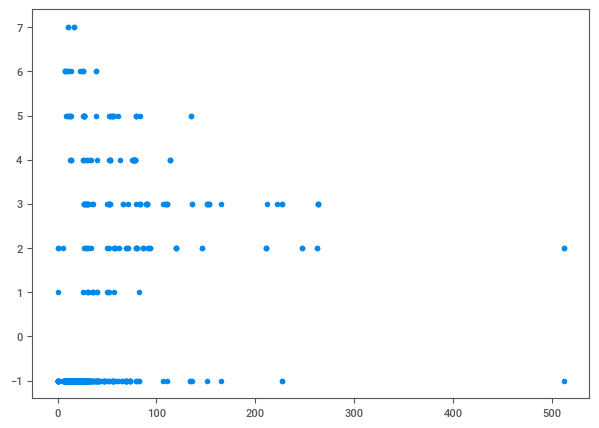

In [37]:
%matplotlib inline

plt.scatter(data_df['Fare'],data_df['cabin_loc1'])
